In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

!pip install koreanize-matplotlib

import koreanize_matplotlib


df = pd.read_csv('/content/drive/MyDrive/data/NHIS_OPEN_GJ_2017.CSV', encoding = 'cp949')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# 1

In [3]:
age_code = {1: '0~4세',
 2: '5~9세',
 3: '10~14세',
 4: '15~19세',
 5: '20~24세',
 6: '25~29세',
 7: '30~34세',
 8: '35~39세',
 9: '40~44세',
 10: '45~49세',
 11: '50~54세',
 12: '55~59세',
 13: '60~64세',
 14: '65~69세',
 15: '70~74세',
 16: '75~79세',
 17: '80~84세',
 18: '85세+'}

In [4]:
# 원본 데이터 보호를 위해 데이터 복사본 생성 
df_new = df.copy()

# 연령대코드(5세단위) 데이터 값을 age_code 값으로 변경
df_new['연령대코드(5세단위)'] = df_new['연령대코드(5세단위)'].map(age_code)

# 연령대코드(5세 단위) -> 연령대로 컬럼명 변경
df_new = df_new.rename(columns = {"연령대코드(5세단위)":"연령대"})

# 연령대별 허리둘레 기술통계 값
df_new.groupby(["연령대"])["허리둘레"].describe()

,count,mean,std,min,25%,50%,75%,max
연령대,,,,,,,,
20~24세,23244.0,75.152220,12.251781,47.5,67.5,73.4,81.0,999.0
25~29세,64898.0,77.704783,16.735734,48.0,69.0,76.5,84.2,999.0
30~34세,77517.0,81.089268,22.988111,49.0,72.0,80.1,88.0,999.0
35~39세,84621.0,82.094012,14.522095,9.2,75.0,82.0,89.0,999.0
40~44세,130912.0,80.488308,10.803098,42.1,73.0,80.0,87.0,999.0
45~49세,118357.0,80.822449,9.521622,40.0,74.0,81.0,87.0,137.0
50~54세,129833.0,81.062754,9.095438,6.5,75.0,81.0,87.0,142.0
55~59세,112175.0,81.799905,8.730398,32.0,76.0,82.0,87.5,139.0
60~64세,106491.0,82.722769,8.596176,0.0,77.0,83.0,88.0,137.0


# 2

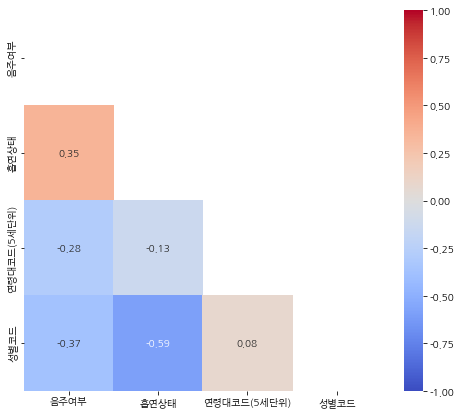

In [5]:
# 상관계수를 구하고자 하는 컬럼명 정하기
columns = ["음주여부", "흡연상태", "연령대코드(5세단위)", "성별코드"]

# 정한 컬럼명들의 상관계수 데이터 프레임 생성(연령대코드(5세단위)컬럼명으로 되어 있는 df 사용)
df_small = df[columns] 
df_corr = df_small.corr()

# heatmap 생성
mask = np.triu(np.ones_like(df_corr, dtype = np.bool_)) # np.bool -> np.bool_

plt.figure(figsize = (8,7))
sns.heatmap(df_corr, annot = True, cmap = "coolwarm", mask = mask, vmax = 1, vmin = -1)

# 3

In [6]:
# 흡연상태, 음주여부 데이터 형태 변경
smoke = {1 : "흡연안함", 2: "끊음", 3: "흡연중"}
drink = {0: "안마심", 1: "마심"}

# 흡연상태 데이터 값을 smoke 값으로 변경
df_new["흡연상태"] = df_new["흡연상태"].replace(smoke)

# 음주여부 데이터 값을 drink 값으로 변경
df_new["음주여부"] = df_new["음주여부"].replace(drink)

# 흡연상태 -> 흡연, 음주여부 -> 음주로 컬럼명 변경
df_new = df_new.rename(columns = {"흡연상태" : "흡연"})
df_new = df_new.rename(columns = {"음주여부" : "음주"})

# crosstab으로 흡연상태, 음주여부 교차테이블 구하기
pd.crosstab(df_new["음주"],df_new["흡연"])

흡연,끊음,흡연안함,흡연중
음주,,,
마심,120779,213743,162166
안마심,55334,394503,52845


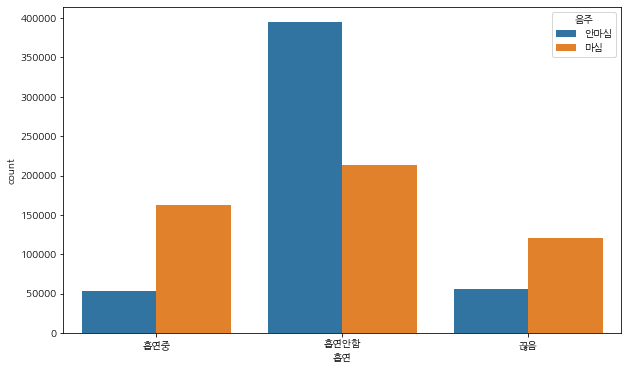

In [7]:
# 막대그래프로 시각화
plt.figure(figsize = (10,6))
sns.countplot(data = df_new, x= "흡연", hue = "음주")

# 4

<Figure size 1440x576 with 0 Axes>

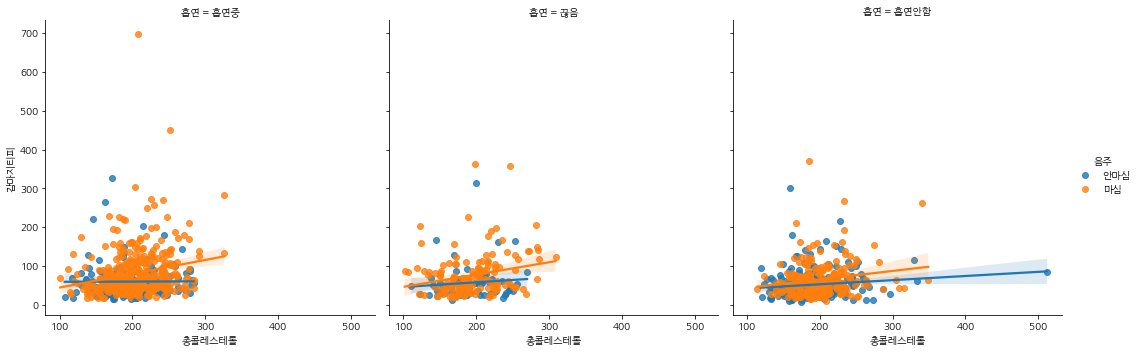

In [8]:
# 체중이 120kg 이상인 데이터 셋 만들기
df_obesity = df_new[df_new["체중(5Kg 단위)"] >= 120]

# 120kg 이상인 사람의 총콜레스테롤, 감마지티피를 음주,흡연에 따라 lmplot으로 시각화
plt.figure(figsize = (20,8))
sns.lmplot(data = df_obesity, x = "총콜레스테롤", y = "감마지티피", hue = "음주", col = "흡연")

# 5

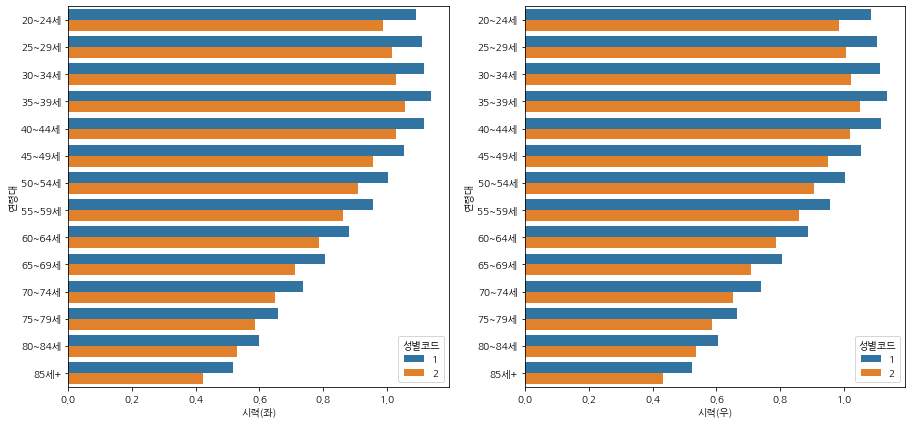

In [9]:
# 실명을 제외한 데이터 셋 만들기
df_noblind = df_new[(df_new["시력(좌)"] != 9.9) & (df_new["시력(우)"] != 9.9)]

# 연령대 순으로 정렬
df_noblind = df_noblind.sort_values(by='연령대')

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,7))
sns.barplot(data=df_noblind, x="시력(좌)", y= "연령대", hue="성별코드", ci=None, ax=axs[0])
sns.barplot(data=df_noblind, x="시력(우)", y= "연령대", hue="성별코드", ci=None, ax=axs[1])